In [35]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [36]:
data=pd.read_csv(r"device_features.csv")

In [37]:
data

,oem_id,brand,model,released_date,announced_date,hardware_designer,manufacturer,codename,general_extras,device_category,...,usb_connector,max_charging_power,bluetooth,WLAN,additional_sensors,battery_capacity,market_regions,info_added_date,x_resolution,y_resolution
0,A135UZKAUSC,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,02-08-23 18:10,1080,2408
1,A135UZKDXAA,Samsung,SM-A135U1/DS Galaxy A13 2022 Standard Edition ...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,01-08-23 09:00,1080,2408
2,A135UZKAVZW,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,31-07-23 23:26,1080,2408
3,PAYB0000JP,Motorola,Moto G53j 5G 2023 Dual SIM TD-LTE JP 128GB XT2...,16-06-23,01-05-23,Lenovo,Lenovo,Motorola Penang,Haptic touch feedback,Smartphone,...,USB C reversible,30.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,Asia,23-07-23 19:14,720,1600
4,MC400,Motorola,Moto G53 5G 2022 Premium Edition TD-LTE LATAM ...,01-01-23,01-12-22,Lenovo,Lenovo,Motorola Penang,Haptic touch feedback,Smartphone,...,USB C reversible,18.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,"North America,South America",23-07-23 15:52,720,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,ZS661KS-6A020EU,Asus,ROG Phone 3 5G Extreme Edition Global Dual SIM...,18-08-20,23-07-20,ASUSTeK Computer,ASUSTeK Computer,Asus I003D,Haptic touch feedback,Smartphone,...,USB C reversible,30.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac,802.11ax","In-screen FP sensor,Hall,L sensor,P sensor,Ste...",6000 mAh battery,"Africa,Asia,Australia,Eastern Europe,Europe,Mi...",12-08-20 16:00,1080,2340
1267,PAG50053ISGB,Lenovo,Legion Phone Duel 5G Premium Edition Global Du...,01-10-20,22-07-20,Lenovo,Lenovo,Lenovo PAG500,"Haptic touch feedback,Tactile touch feedback",Smartphone,...,USB C reversible,65.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac,802.11ax","In-screen FP sensor,Hall,L sensor,P sensor",5000 mAh battery,"Africa,Asia,Eastern Europe,Europe,Middle East,...",11-08-20 14:00,1080,2340
1268,MC361,Motorola,Moto G 5G Plus 2020 Global Dual SIM TD-LTE 128...,19-07-20,01-07-20,Motorola Mobile Devices,Lenovo,Motorola Nairobi,Haptic touch feedback,Smartphone,...,USB C reversible,20.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,"Asia,Australia,Eastern Europe,Europe,Middle Ea...",21-07-20 22:15,1080,2520
1269,G986UZPAXAA,Samsung,SM-G986U1 Galaxy S20+ 5G BTS Edition TD-LTE US...,16-07-20,14-06-20,Samsung Electronics,Samsung Electronics,Samsung Hubble 1 5G,Haptic touch feedback,Smartphone,...,USB C reversible,25.0,Bluetooth 5.0,"802.11a,802.11b,802.11i,802.11g,802.11n,802.11...","Barometer,In-screen FP sensor,Hall,HR sensor,L...",4500 mAh battery,North America,16-07-20 10:41,1440,3200


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   oem_id                        1271 non-null   object 
 1   brand                         1271 non-null   object 
 2   model                         1271 non-null   object 
 3   released_date                 1271 non-null   object 
 4   announced_date                1271 non-null   object 
 5   hardware_designer             1271 non-null   object 
 6   manufacturer                  1271 non-null   object 
 7   codename                      1271 non-null   object 
 8   general_extras                1271 non-null   object 
 9   device_category               1271 non-null   object 
 10  width                         1271 non-null   float64
 11  height                        1271 non-null   float64
 12  depth                         1271 non-null   float64
 13  dim

####  a1. Retrieve the model name, manufacturer, weight, price, and price unit for the device(s) based on the oem_id.

In [51]:
def retrieve_device_info(file_path, oem_id):
    try:
        with open(file_path, newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            found_devices = []

            for row in reader:
                if row['oem_id'] == oem_id:
                    device_info = {
                        'Model Name': row['model'],
                        'Manufacturer': row['manufacturer'],
                        'Weight': row['weight_gram'],
                        'Price': row['price'],
                        'Price Unit': row['price_currency']
                    }
                    found_devices.append(device_info)

            return found_devices

    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage:
file_path =("D:\infinite solutions\ID 3845\ID3845\dataset 2.csv")  # Replace with the actual path to your CSV file
oem_id_to_search = 'A135UZKAUSC'  # Replace with the desired OEM ID

devices_info = retrieve_device_info(file_path, oem_id_to_search)
if devices_info:
    print(f"Found {len(devices_info)} device(s) with OEM ID {oem_id_to_search}:")
    for device in devices_info:
        print(device)
else:
    print("No devices found with the specified OEM ID.")

File not found. Please provide a valid file path.
No devices found with the specified OEM ID.


#### a2. Retrieve the brand, model name, RAM capacity, market regions, and the date when the information was added for device(s) associated with a specified code name.

In [52]:


def retrieve_device_info(file_path, codename):
    try:
        df = pd.read_csv(file_path)  # Load data from the CSV file
        filtered_devices = df[df['codename'] == codename]  # Filter devices based on the specified codename

        if filtered_devices.empty:
            return "No devices found with the specified codename."
        
        # Retrieve specific columns for the filtered devices
        device_info = filtered_devices[['brand', 'model', 'ram_capacity', 'market_regions', 'info_added_date']]
        
        return device_info

    except FileNotFoundError:
        return "File not found. Please provide a valid file path."
    except Exception as e:
        return f"An error occurred: {e}"

# Example usage:
file_path = ("device_features.csv")  # Replace with the actual path to your CSV file
codename_to_search = 'Samsung A135'  # Replace with the desired codename

result = retrieve_device_info(file_path, codename_to_search)
print(result)

       brand                                              model  ram_capacity  \
0    Samsung  SM-A135U Galaxy A13 2022 Standard Edition TD-L...             3   
1    Samsung  SM-A135U1/DS Galaxy A13 2022 Standard Edition ...             3   
2    Samsung  SM-A135U Galaxy A13 2022 Standard Edition TD-L...             3   
7    Samsung  SM-A135U Galaxy A13 2022 Standard Edition Dual...             3   
206  Samsung  SM-A135N Galaxy A13 2022 Premium Edition TD-LT...             4   
564  Samsung  SM-A135F Galaxy A13 2022 Premium Edition Globa...             4   
565  Samsung  SM-A135F/DSN Galaxy A13 2022 Premium Edition G...             4   
566  Samsung  SM-A135M Galaxy A13 2022 Premium Edition TD-LT...             4   
567  Samsung  SM-A135M/DS Galaxy A13 2022 Premium Edition Du...             4   
568  Samsung  SM-A135F/DS Galaxy A13 2022 Premium Edition Gl...             4   
569  Samsung  SM-A135F/DS Galaxy A13 2022 Top Edition Global...             6   
570  Samsung  SM-A135F/DS Ga

#### a3. Retrieve the oem_id, release date, announcement date, dimensions, and device category of the device(s) based on a specified RAM capacity.

In [54]:


def retrieve_device_info_by_ram(file_path, ram_capacity):
    try:
        with open(file_path, newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            found_devices = []

            for row in reader:
                if int(row['ram_capacity']) == ram_capacity:
                    device_info = {
                        'oem_id': row['oem_id'],
                        'released_date': row['released_date'],
                        'announced_date': row['announced_date'],
                        'dimensions': row['dimensions'],
                        'device_category': row['device_category']
                    }
                    found_devices.append(device_info)

            return found_devices

    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage:
file_path = ("device_features.csv")  # Replace with the actual path to your CSV file
ram_capacity_to_search = 4  # Replace with the desired RAM capacity

devices_info = retrieve_device_info_by_ram(file_path, ram_capacity_to_search)
if devices_info:
    print(f"Found {len(devices_info)} device(s) with RAM capacity {ram_capacity_to_search}GB:")
    for device in devices_info:
        print(device)
else:
    print(f"No devices found with RAM capacity {ram_capacity_to_search}GB.")

Found 253 device(s) with RAM capacity 4GB:
{'oem_id': 'MC400', 'released_date': '01-01-23', 'announced_date': '01-12-22', 'dimensions': '2.94x6.41x0.32 inches', 'device_category': 'Smartphone'}
{'oem_id': 'MC401', 'released_date': '16-02-23', 'announced_date': '01-12-22', 'dimensions': '2.94x6.41x0.32 inches', 'device_category': 'Smartphone'}
{'oem_id': 'TA-1430', 'released_date': '01-10-22', 'announced_date': '22-09-22', 'dimensions': '3.02x6.56x0.35 inches', 'device_category': 'Smartphone'}
{'oem_id': 'TA-1476', 'released_date': '24-08-22', 'announced_date': '01-01-22', 'dimensions': '3.02x6.55x0.35 inches', 'device_category': 'Smartphone'}
{'oem_id': 'TA-1448', 'released_date': '24-08-22', 'announced_date': '01-01-22', 'dimensions': '3.02x6.55x0.35 inches', 'device_category': 'Smartphone'}
{'oem_id': 'ZAAM0094JP', 'released_date': '01-06-22', 'announced_date': '01-05-22', 'dimensions': '9.89x6.25x0.29 inches', 'device_category': 'Tablet'}
{'oem_id': 'ZAAJ0010US', 'released_date': '0

#### a4. Retrieve information from your chosen columns and apply a specific condition that relates to an individual device. Please select at least three columns and one condition that differs from previous requirements.

In [55]:


# Load the CSV file into a DataFrame
file_path =("device_features.csv")  
data = pd.read_csv(file_path)

# Define the condition for filtering
weight_condition = data['weight_gram'] < 150
price_condition = (data['price'] < 500) & (data['price_currency'] == 'currency_unit')  # Replace 'currency_unit' with the actual currency

# Apply the conditions to filter the data
filtered_data = data[weight_condition & price_condition]

# Select specific columns from the filtered data
selected_columns = filtered_data[['model', 'manufacturer', 'weight_gram', 'price', 'price_currency']]

# Display the filtered information
print(selected_columns)

Empty DataFrame
Columns: [model, manufacturer, weight_gram, price, price_currency]
Index: []


#### b1. Identify the top 5 regions where a specific brand of devices was sold.

In [57]:


# Load data from the CSV file into a DataFrame
file_path = ("device_features.csv")    # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Brand for which you want to find the top 5 regions
brand_to_analyze = 'Samsung'  # Replace with the desired brand name

# Filter data for the specified brand and count occurrences of regions
brand_data = data[data['brand'] == brand_to_analyze]
regions_count = brand_data['market_regions'].value_counts().head(5)

# Display the top 5 regions where the specified brand of devices was sold
print(f"Top 5 regions for {brand_to_analyze}:")
print(regions_count)


Top 5 regions for Samsung:
market_regions
North America                                                                                                                                          275
Asia                                                                                                                                                   101
Asia,Southeast Asia                                                                                                                                     52
Africa,Asia,Australia,Central America,Eastern Europe,Europe,Middle East,North America,Oceania,South America,Southeast Asia,Western Europe,Worldwide     11
North America,South America                                                                                                                              9
Name: count, dtype: int64


#### b2. Analyse the average price of devices within a specific brand, all in the same currency.

In [59]:


# Load the data from the CSV file
file_path = ("device_features.csv")  # Replace with your file path
data = pd.read_csv(file_path)

# Specify the brand you want to analyze
brand_to_analyze = 'Samsung'  # Replace 'YourBrandName' with the desired brand

# Filter the data for the specific brand
brand_data = data[data['brand'] == brand_to_analyze]

if not brand_data.empty:
    # Calculate the average price of devices within the specific brand
    average_price = brand_data['price'].mean()

    print(f"Average price of devices in the brand '{brand_to_analyze}': {average_price:.2f} {brand_data['price_currency'].iloc[0]}")
else:
    print(f"No data found for the brand '{brand_to_analyze}'.")

Average price of devices in the brand 'Samsung': 199633.85 USD


#### b3. Analyse the average mass for each manufacturer and display the list of average mass for all manufacturers.

In [60]:


# Load data from the CSV file into a pandas DataFrame
file_path = ("device_features.csv")  # Replace this with your file path
data = pd.read_csv(file_path)

# Calculate the average mass for each manufacturer
average_mass = data.groupby('manufacturer')['weight_gram'].mean().reset_index()

# Display the list of average mass for all manufacturers
print("Average Mass for Each Manufacturer:")
print(average_mass[['manufacturer', 'weight_gram']])

Average Mass for Each Manufacturer:
                        manufacturer  weight_gram
0                   ASUSTeK Computer   221.367347
1                    BBK Electronics   201.000000
2          FIH Precision Electronics   203.750000
3                            Foxconn   315.147975
4                  Hon Hai Precision   144.000000
5                     LG Electronics   204.075000
6                             Lenovo   216.975904
7                     Luxshare iTech    31.605000
8                          Microsoft   284.000000
9          Rising Stars Mobile India   196.500000
10               Samsung Electronics   205.644040
11                             Sharp   209.500000
12  Shenzhen TINNO Mobile Technology   198.840000
13                              Sony   189.363636
14                   Wingtech Mobile   204.500000
15                            Xiaomi   190.545455
16                               ZTE   195.500000


#### b4. Analyse the data to derive meaningful insights based on your unique selection, distinct from the previous requirements.

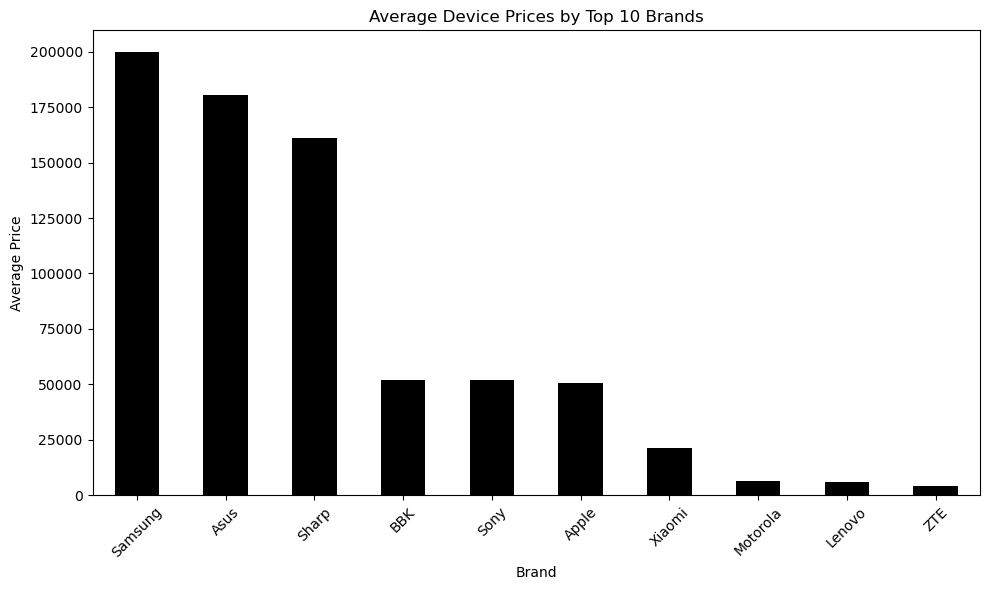

In [61]:
# Load the data from the CSV file using Pandas
file_path = ("device_features.csv")  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Analyzing device prices across different brands
brand_prices = data.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

# Visualizing average prices of top 10 brands
plt.figure(figsize=(10, 6))
brand_prices.plot(kind='bar', color='black')
plt.title('Average Device Prices by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### c1. Create a chart to visually represent the proportion of RAM types for devices in the current market.

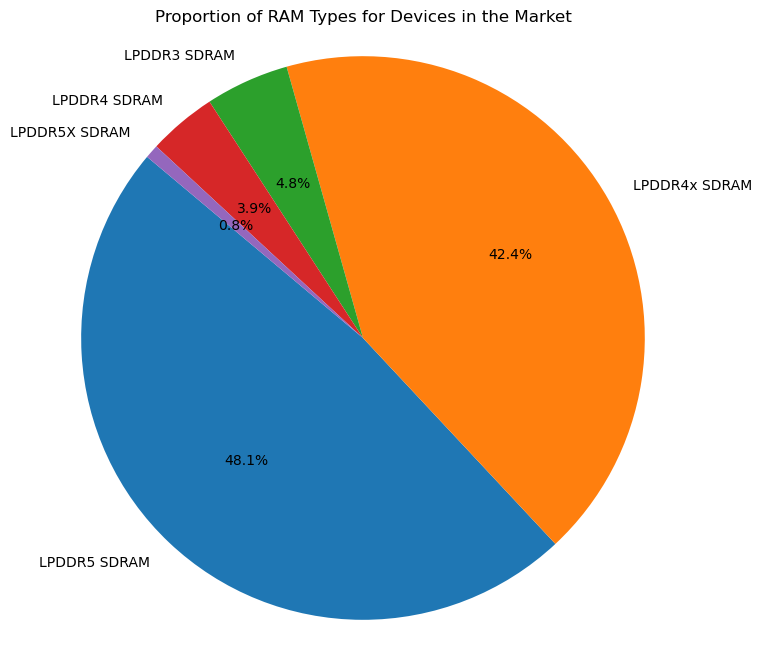

In [62]:


# Load data from the CSV file
file_path =  ("device_features.csv")  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Calculate the proportion of RAM types
ram_type_counts = data['ram_type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ram_type_counts, labels=ram_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of RAM Types for Devices in the Market')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#### c2. Create a chart to visually compare the number of devices for each USB connector type

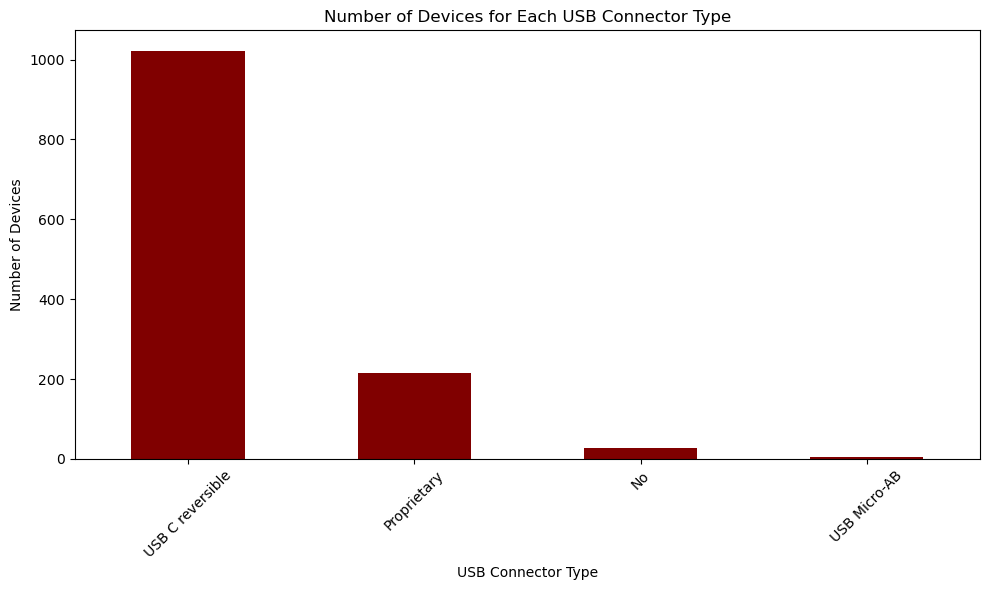

In [48]:


# Assuming 'data' is your DataFrame containing the loaded data from the CSV file

# Assuming 'data' contains a column named 'usb_connector' indicating the USB connector type

# Counting the number of devices for each USB connector type
usb_connector_counts = data['usb_connector'].value_counts()

# Plotting the counts using matplotlib
plt.figure(figsize=(10, 6))
usb_connector_counts.plot(kind='bar', color='maroon')
plt.title('Number of Devices for Each USB Connector Type')
plt.xlabel('USB Connector Type')
plt.ylabel('Number of Devices')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()


##### c3. Create separate charts illustrating the monthly average price trends (in GBP) for devices released in each year from 2020 to 2023. Each chart should focus on a specific year.

C:\Users\44789\AppData\Local\Temp\ipykernel_19296\649390546.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['released_date'] = pd.to_datetime(data['released_date'])


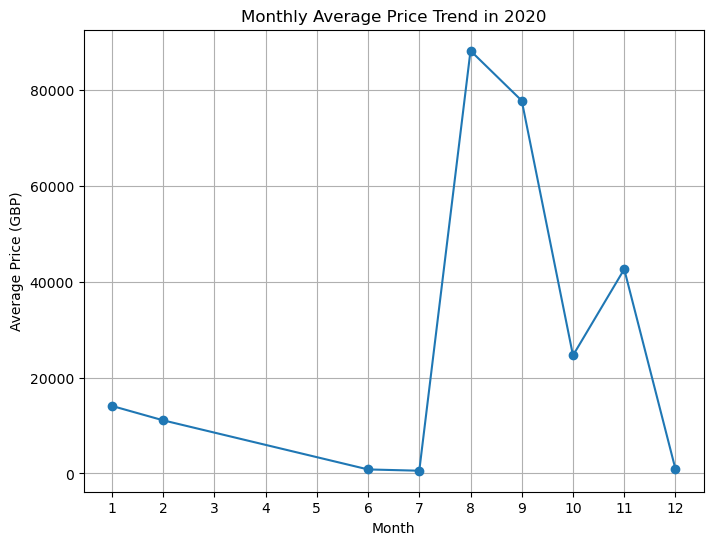

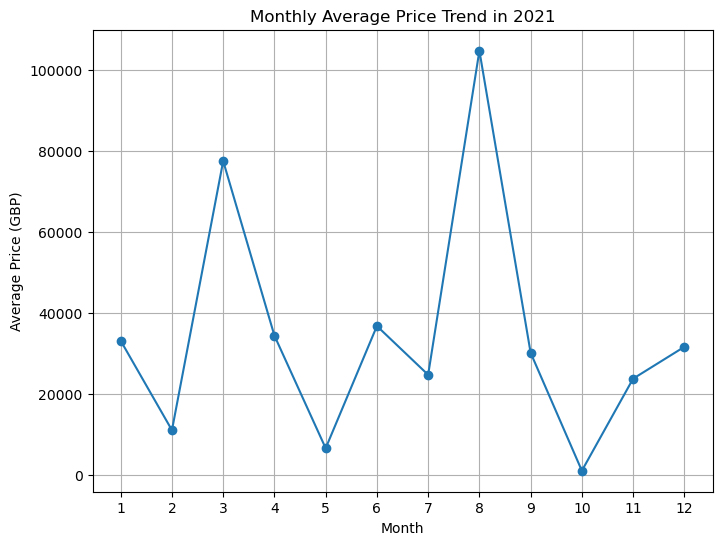

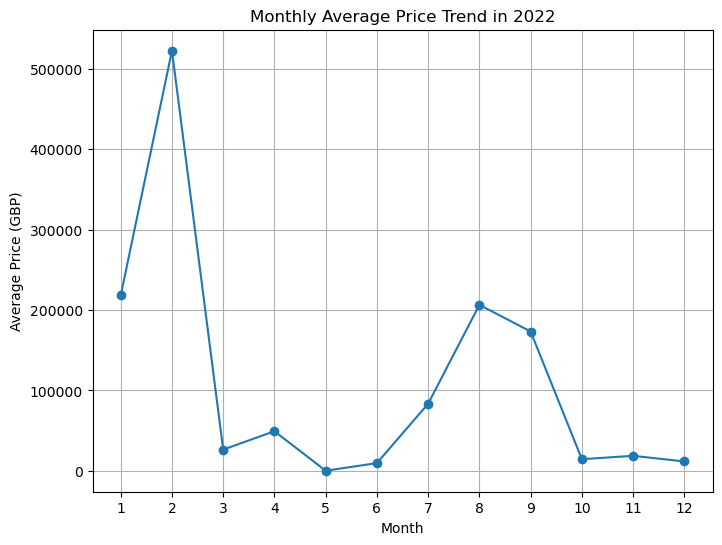

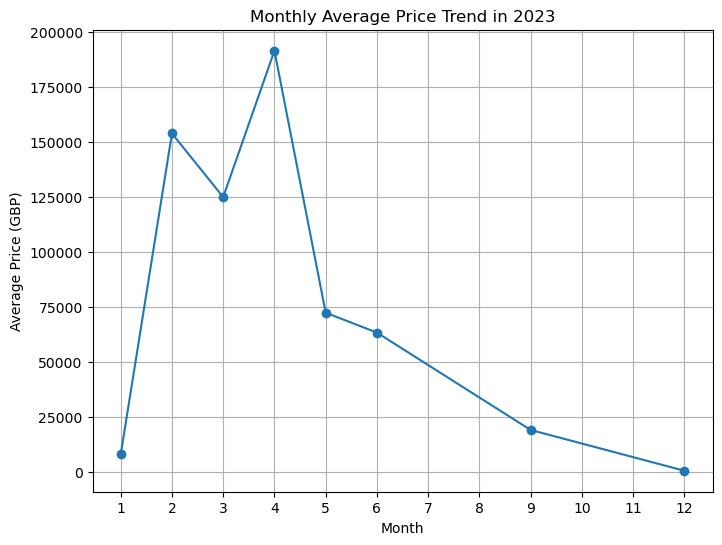

In [63]:
# Load the data from the CSV file
file_path =("device_features.csv")  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'released_date' to datetime
data['released_date'] = pd.to_datetime(data['released_date'])

# Extract year and month information
data['year'] = data['released_date'].dt.year
data['month'] = data['released_date'].dt.month

# Filter data for the years 2020 to 2023
years_to_plot = [2020, 2021, 2022, 2023]
filtered_data = data[data['year'].isin(years_to_plot)]

# Calculate monthly average prices for each year
grouped = filtered_data.groupby(['year', 'month'])['price'].mean().reset_index()

# Plotting separate charts for each year
for year in years_to_plot:
    year_data = grouped[grouped['year'] == year]
    
    plt.figure(figsize=(8, 6))
    plt.plot(year_data['month'], year_data['price'], marker='o', linestyle='-')
    plt.title(f"Monthly Average Price Trend in {year}")
    plt.xlabel("Month")
    plt.ylabel("Average Price (GBP)")
    plt.xticks(range(1, 13))  # Assuming months are numbered from 1 to 12
    plt.grid(True)
    plt.show()


#### c4. Create a visualisation of your selection to showcase information related to device features that can reveal trends, behaviours, or patterns, ensuring it is distinct from previous requirements.

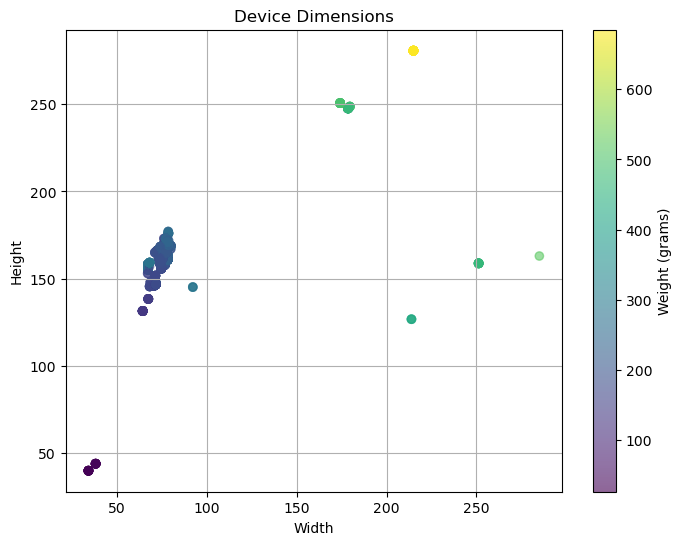

In [64]:
# Load data from CSV
file_path = ("device_features.csv")
data = pd.read_csv(file_path)

# Creating a scatter plot to visualize device dimensions
plt.figure(figsize=(8, 6))
plt.scatter(data['width'], data['height'], c=data['weight_gram'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Weight (grams)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Device Dimensions')
plt.grid(True)
plt.show()
